In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
Bank=pd.read_excel(r"D:\Bank_RF2.xlsx")
Bank.head()

,Age,Job,Marital,Education,Default,Balance,Housing_Loan,Personal_Loan,Current_Campaign,Previous_Campaign,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,1,0,no
1,44,technician,single,secondary,no,29,yes,no,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,0,no
4,33,unknown,single,unknown,no,1,no,no,1,0,no


In [2]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                45211 non-null  int64 
 1   Job                45211 non-null  object
 2   Marital            45211 non-null  object
 3   Education          45211 non-null  object
 4   Default            45211 non-null  object
 5   Balance            45211 non-null  int64 
 6   Housing_Loan       45211 non-null  object
 7   Personal_Loan      45211 non-null  object
 8   Current_Campaign   45211 non-null  int64 
 9   Previous_Campaign  45211 non-null  int64 
 10  Subscribed         45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [3]:
Bank.Subscribed.value_counts()

Subscribed
no     39922
yes     5289
Name: count, dtype: int64

In the given bank dataset, proportion of customers who responds to the lelemarketing is amproximately 11.5%, while the remaining 88.5% did not respond. Thus, the representation of the two classes(responded,did not respond) in the dataset is unequal • The dataset is quite imbalanced, with the classes not being equally represented. In such cases, the model may struggle to learn effectively and may be biased towards the class that is over-represented. • Even if the model predicts that no customer will subscribe (i.e., predicts all negatives), it will achieve an accuracy of more than 88%. • This phenomenon is known as the Accuracy Paradox • The objective of building a model in this scenario is to identify the customers who will subscribe to the term deposit, i.e., to increase the number of True Positives.

Dealing with imbalanced dataset One approach to dealing with an imbalanced dataset is bootstrapping, which involves resampling techniques such as upsampling and downsampling.

Upsampling: Increase the number of instances of the under- represented minority class by replicating the existing observations in the dataset. Sampling with replacement is used for this purpose and is also known as Oversampling.
Downsampling: Reduce the number of instances of the over- represented majority class by removing some of the existing observations from the dataset. This technique is also known as Undersampling.
Bootstrapping Bootstrapping is a statistical method used to estimate the distribution of a sample statistic by resampling with replacement from the original data. It is commonly used in various applications such as:

Estimating Uncertainty: Bootstrapping allows you to estimate the variability or confidence intervals of a statistic (e.g., mean, median, variance) by creating multiple samples (bootstrap samples) from the original data. This helps assess the reliability of the statistic.
Model Validation: In machine learning, bootstrapping is used to create training and test sets for model evaluation. For example, in ensemble methods like Bagging (Bootstrap Aggregating), multiple models are trained on different bootstrap samples to improve the overall performance and robustness of the model.
Handling Imbalanced Datasets: As mentioned earlier, bootstrapping can help address class imbalance in datasets by resampling the data. This involves techniques like upsampling (adding more samples to the minority class) and downsampling (reducing samples from the majority class).

In [4]:
from sklearn.utils import resample
Bank_subscribed_no=Bank[Bank.Subscribed=='no']
Bank_subscribed_yes=Bank[Bank.Subscribed=='yes']

In [5]:
df_minority_upsampled=resample(Bank_subscribed_yes,replace=True,n_samples=20000)
New_Bank_df=pd.concat([Bank_subscribed_no,df_minority_upsampled])

In [6]:
New_Bank_df.Subscribed.value_counts()

Subscribed
no     39922
yes    20000
Name: count, dtype: int64

In [7]:
from sklearn.utils import shuffle
New_Bank_df=shuffle(New_Bank_df)

In [8]:
X_features=list(New_Bank_df.columns)
X_features.remove('Subscribed')
X_features

['Age',
 'Job',
 'Marital',
 'Education',
 'Default',
 'Balance',
 'Housing_Loan',
 'Personal_Loan',
 'Current_Campaign',
 'Previous_Campaign']

In [9]:
encoded_bank_df=pd.get_dummies(New_Bank_df[X_features],drop_first=True)
X=encoded_bank_df

In [10]:
X.head()

,Age,Balance,Current_Campaign,Previous_Campaign,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,...,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Default_yes,Housing_Loan_yes,Personal_Loan_yes
38859,35,1312,1,0,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
39433,27,616,1,1,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
29606,39,-114,1,0,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,True,False
11116,60,0,1,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
27871,38,275,1,0,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False


In [11]:
Y=New_Bank_df.Subscribed.map(lambda x:int(x=='yes'))

In [12]:
Y.head()

38859    0
39433    1
29606    1
11116    0
27871    0
Name: Subscribed, dtype: int64

In [13]:
Y

38859    0
39433    1
29606    1
11116    0
27871    0
        ..
24354    0
31237    1
35897    0
2239     0
26208    1
Name: Subscribed, Length: 59922, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
classifier_rf.fit(train_X,train_Y)
classifier_rf.oob_score_

0.7257599237096197

In [16]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(train_X,train_Y)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred_y=logit.predict(test_X)

In [18]:
from sklearn import metrics
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [19]:
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted)
    sn.heatmap(cm,annot=True,fmt='.2f',xticklabels=["Subscribed","Not Subscribed"],yticklabels=["Subscribed","Not Subscribed"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

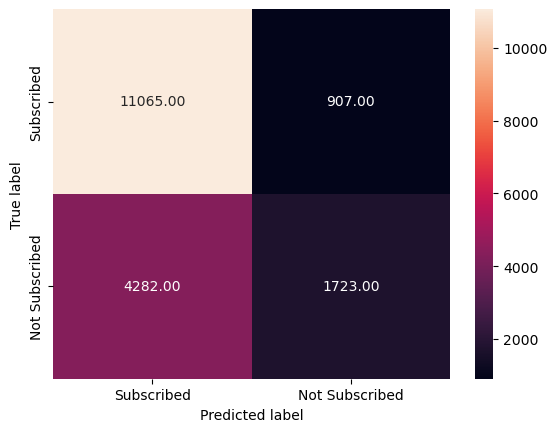

In [20]:
cm=draw_cm(test_Y,pred_y)

In [21]:
print(metrics.classification_report(test_Y,pred_y))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81     11972
           1       0.66      0.29      0.40      6005

    accuracy                           0.71     17977
   macro avg       0.69      0.61      0.60     17977
weighted avg       0.70      0.71      0.67     17977



In [22]:
predict_p_df=pd.DataFrame(logit.predict_proba(test_X))
predict_p_df.head()

,0,1
0,0.593418,0.406582
1,0.802587,0.197413
2,0.737610,0.262390
3,0.576203,0.423797
4,0.481368,0.518632


In [23]:
##Initialize the DataFrame with  actual class labels
test_results_df=pd.DataFrame({'actual':test_Y})
test_results_df=test_results_df.reset_index()
##Assigning the probability values for class label 1
test_results_df['chd_1']=predict_p_df.iloc[:,1:2]
test_results_df.head(5)

,index,actual,chd_1
0,18943,0,0.406582
1,32031,0,0.197413
2,2328,1,0.262390
3,44723,1,0.423797
4,44239,1,0.518632


In [24]:
#Step 15: ROC Accuracy
#passing actual class labels and predicted probability values 
#to compute ROC AUC score
auc_score=metrics.roc_auc_score(test_results_df.actual,test_results_df.chd_1)
round(float(auc_score),2)

0.7

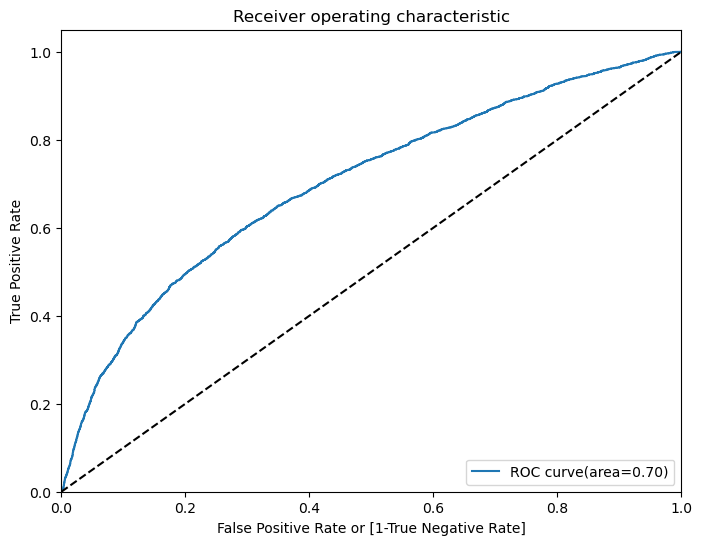

In [25]:
#step 16: ROC curve
#plotting ROC curve
def draw_roc_curve(model,test_X,test_y):
    test_results_df=pd.DataFrame({'actual':test_y})
    test_results_df=test_results_df.reset_index()
predict_proba_df=pd.DataFrame(logit.predict_proba(test_X))
test_results_df['chd_1']=predict_proba_df.iloc[:,1:2]
fpr,tpr,thresholds=metrics.roc_curve(test_results_df.actual,test_results_df.chd_1,drop_intermediate=False)
auc_score=metrics.roc_auc_score(test_results_df.actual,test_results_df.chd_1)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
#step 17: Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
##initializing the random Forest Classifier with max_dept and n_estimators
radm_clf=RandomForestClassifier(max_depth=10,n_estimators=10)
radm_clf.fit(train_X,train_Y)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [27]:
#step 18: Random Forest Classifier
rf=RandomForestClassifier(max_depth=10,criterion='entropy',oob_score=True,n_estimators=200,min_samples_leaf=10,random_state=0,max_features=7,class_weight={0:1,1:5})
rf.fit(train_X,train_Y)
pred_class=rf.predict(test_X)
pred_prob=rf.predict_proba(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y,pred_class)


array([[3016, 8956],
       [ 216, 5789]], dtype=int64)

In [28]:
#step 19:Creating RandomForest Trees
rf=RandomForestClassifier(max_depth=10,criterion='gini',oob_score=True,n_estimators=200,min_samples_leaf=1,random_state=0,max_features=7)
rf.fit(train_X,train_Y)

RandomForestClassifier(max_depth=10, max_features=7, n_estimators=200,
                       oob_score=True, random_state=0)

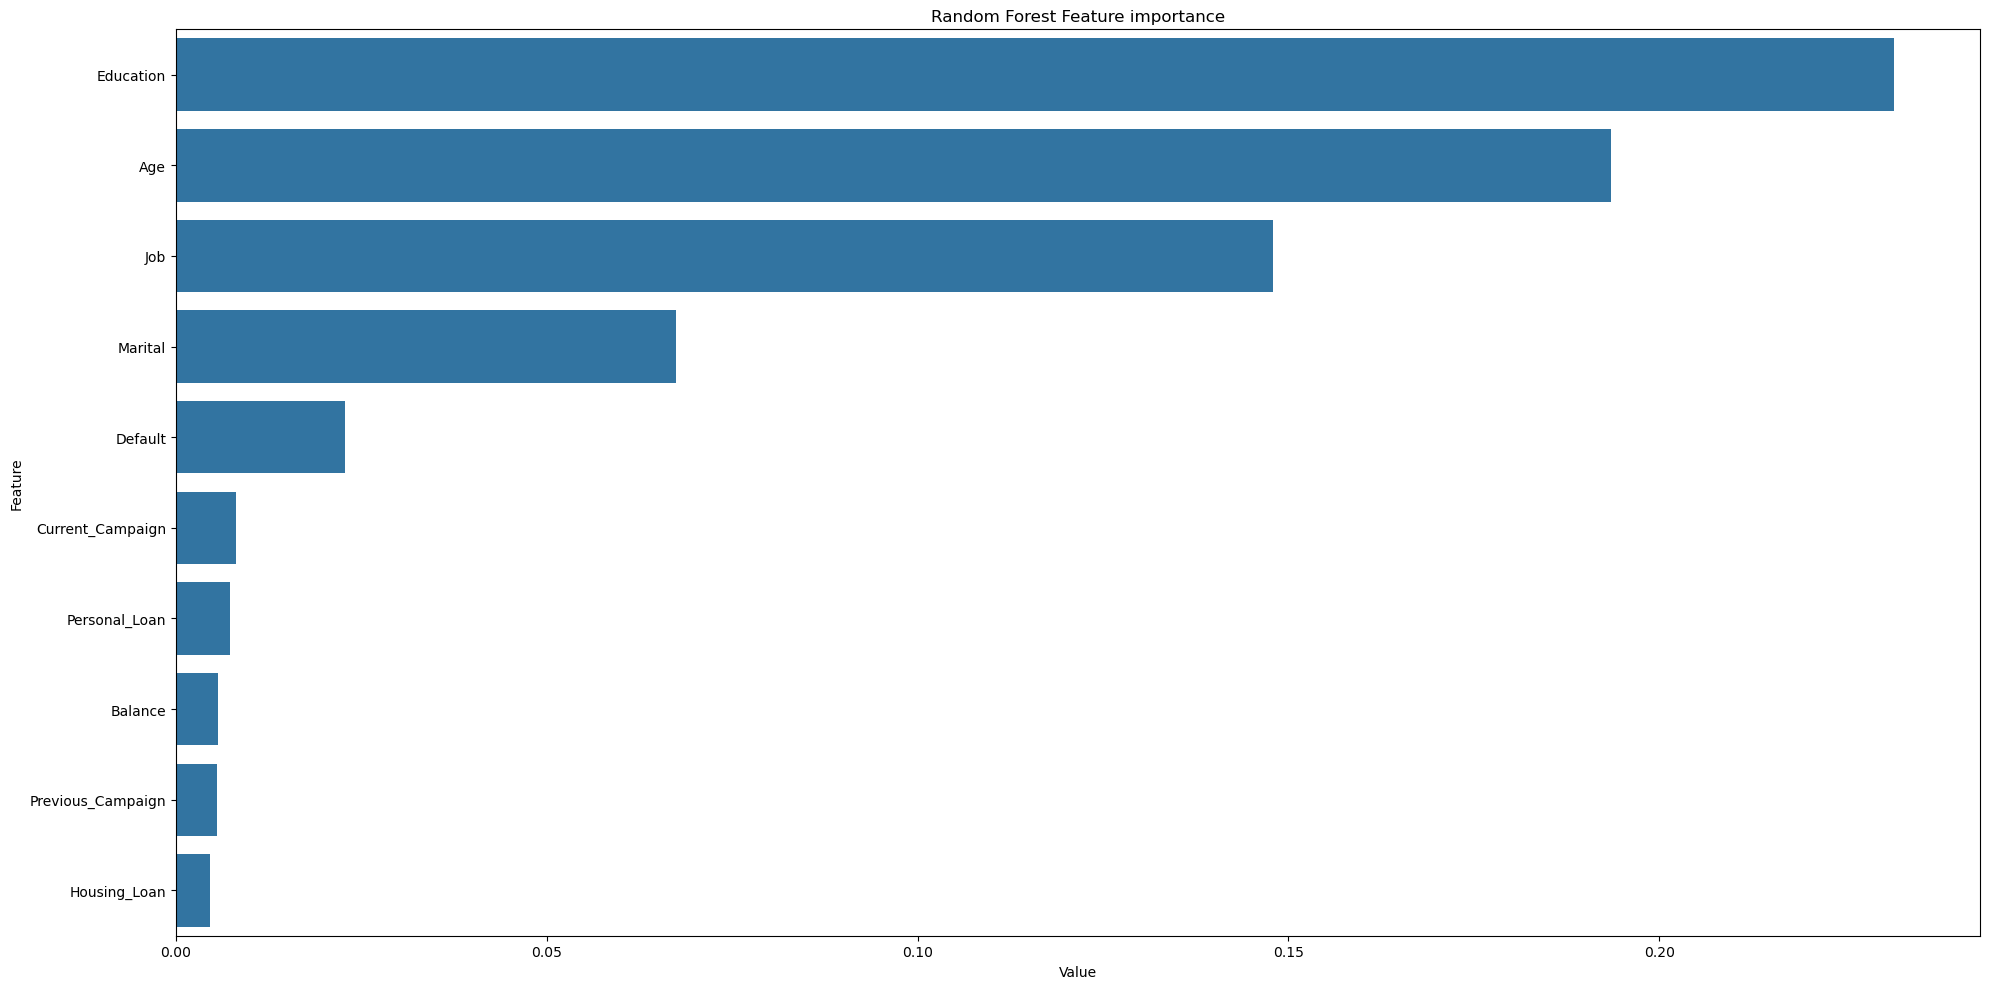

In [29]:
#step 20: Feature importance of random forest tree
sorted(zip(rf.feature_importances_,X_features),reverse=True)
#plotting features importance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
feature_imp=pd.DataFrame(sorted(zip(rf.feature_importances_,X_features)),columns=['Value','Feature'])
plt.figure(figsize=(20,10))
sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False))
plt.title('Random Forest Feature importance')
plt.tight_layout()
plt.show()